# 04_bao_anisotropy
Toy E/B-style parity from an anisotropic ring.

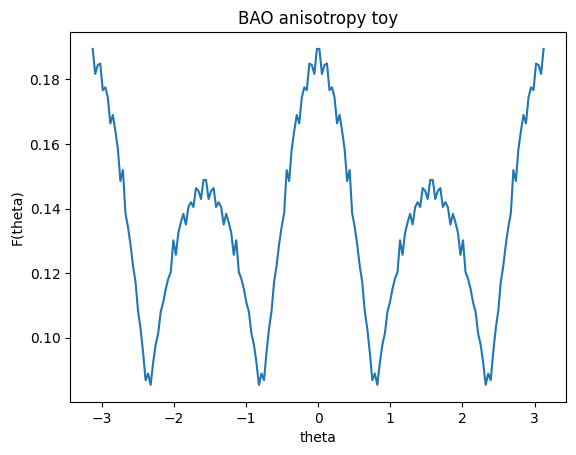

E_over_B 37801850.85580217
PASS


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
K = 256
kmax = 3.0
kx = np.linspace(-kmax, kmax, K, dtype=np.float32)
ky = np.linspace(-kmax, kmax, K, dtype=np.float32)
KX, KY = np.meshgrid(kx, ky, indexing="xy")
R = np.sqrt(KX**2 + KY**2)
TH = np.arctan2(KY, KX)
k0 = 1.2
sig = 0.25
eps = 0.12
P = np.exp(-((R - k0)**2) / (2.0*sig*sig)) * (1.0 + eps*np.cos(2.0*TH))

bins = 180
edges = np.linspace(-np.pi, np.pi, bins+1, dtype=np.float64)
idx = np.digitize(TH.ravel(), edges) - 1
idx = np.clip(idx, 0, bins-1)
cnt = np.bincount(idx, minlength=bins).astype(np.float64)
sumP = np.bincount(idx, weights=P.ravel(), minlength=bins).astype(np.float64)
F = sumP / (cnt + 1e-12)
theta = 0.5*(edges[:-1] + edges[1:])

a = np.fft.rfft(F)
amps = np.abs(a)
even = np.sum(amps[2::2])
odd = np.sum(amps[1::2])
ratio = float((even + 1e-12)/(odd + 1e-12))

plt.figure()
plt.plot(theta, F)
plt.xlabel("theta")
plt.ylabel("F(theta)")
plt.title("BAO anisotropy toy")
plt.show()

print("E_over_B", ratio)
assert np.isfinite(F).all()
assert ratio > 1.05
print("PASS")